## Hardware check

In [1]:
# gpu check
!nvidia-smi

Fri Aug 23 13:24:08 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla V100-SXM2-32GB           On  |   00000000:B2:00.0 Off |                    0 |
| N/A   36C    P0             43W /  300W |      17MiB /  32768MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# check number of cores
import multiprocessing

cores = multiprocessing.cpu_count() 
cores

80

## Environment Prep

In [3]:
cd /pfs/data5/home/hd/hd_hd/hd_nf283/MA_Thesis/

/pfs/data5/home/hd/hd_hd/hd_nf283/MA_Thesis


In [4]:
import pickle
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas()
import json
import gc

In [5]:
data_path = 'LIME/Data/cb_test_texts.pkl'
text_texts = pickle.load(open(data_path, 'rb'))

In [7]:
# len(text_texts[0])

# s = set()

# for i in tqdm(range(11469)):
#     texts = text_texts[0][i]
#     for text in texts:
#         if 'septic' in text and 'sepsi' in text and 'SIRS' in text:
#             s.add(i)

In [8]:
# c = []

# for i in s:
#     c.append(len(text_texts[0][i]))
    
# counter = Counter(c)
# sorted(counter.items())

In [7]:
len(text_texts[0])

s = set()

for i in tqdm(range(11469)):
    texts = text_texts[0][i]
    for text in texts:
        if 'septic' in text or 'sepsi' in text or 'SIRS' in text:
                s.add(i)

100%|██████████| 11469/11469 [00:00<00:00, 16674.77it/s]


In [7]:
len(text_texts[0])

s = set()

for i in tqdm(range(11469)):
    texts = text_texts[0][i]
    if len(texts) == 1:
        for text in texts:
            if 'septic' in text or 'sepsi' in text or 'SIRS' in text:
                    s.add(i)

100%|██████████| 11469/11469 [00:00<00:00, 1009855.62it/s]


In [8]:
s

{661,
 1482,
 1802,
 2126,
 2323,
 2840,
 2857,
 3594,
 4434,
 4862,
 5111,
 5524,
 7147,
 7653,
 8054,
 8380,
 9035,
 9204,
 9547,
 10214,
 10244,
 10382,
 10453,
 10484,
 10627,
 10729,
 11175}

In [9]:
len(s)

27

In [6]:
from collections import Counter

In [8]:
c = []

for i in s:
    c.append(len(text_texts[0][i]))
    
counter = Counter(c)
sorted(counter.items())

[(1, 27),
 (2, 403),
 (3, 202),
 (4, 148),
 (5, 149),
 (6, 162),
 (7, 158),
 (8, 123),
 (9, 113),
 (10, 111),
 (11, 83),
 (12, 72),
 (13, 57),
 (14, 51),
 (15, 40),
 (16, 33),
 (17, 29),
 (18, 23),
 (19, 23),
 (20, 18),
 (21, 15),
 (22, 13),
 (23, 13),
 (24, 7),
 (25, 3),
 (26, 8),
 (27, 5),
 (28, 3),
 (29, 4),
 (30, 3),
 (31, 1),
 (32, 2),
 (34, 2)]

<Axes: >

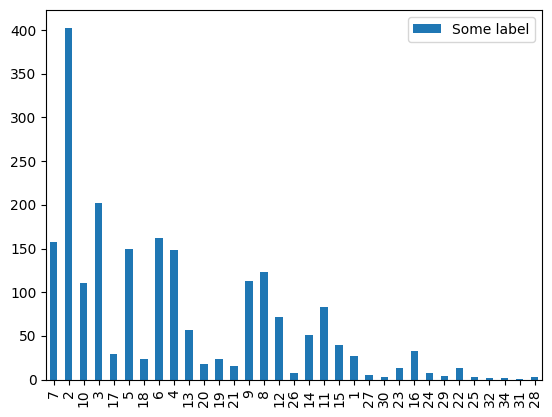

In [9]:
import numpy as np
import pandas as pd

df = pd.DataFrame.from_dict(counter, orient='index', columns=['Some label'])
df.plot.bar()

In [20]:
c = 0
for i in s:
    # print(i)
    # print(len(text_texts[0][i]))
    # print('=====')
    if len(text_texts[0][i]) == 1:
        print(text_texts[0][i])
        c += 1
c

["[**2174-1-29**] 11:18 AM\n CAROT/CEREB [**Hospital1 **]                                                  Clip # [**Clip Number (Radiology) 60218**]\n Reason: angiogram for assessment and coiling of Left PCOMM aneurysm\n Admitting Diagnosis: SUBARACHNOID HEMORRHAGE\n  Contrast: OMNIPAQUE Amt: 310\n ********************************* CPT Codes ********************************\n * [**Numeric Identifier 284**] EMBO TRANSCRANIAL               [**Numeric Identifier 285**] SEL CATH 3RD ORDER [**Last Name (un) 286**]          *\n * -59 DISTINCT PROCEDURAL SERVICE       [**Numeric Identifier 287**] SEL CATH 2ND ORDER               *\n * -59 DISTINCT PROCEDURAL SERVICE       [**Numeric Identifier 287**] SEL CATH 2ND ORDER               *\n * -59 DISTINCT PROCEDURAL SERVICE       [**Numeric Identifier 288**] CAROTID/CEREBRAL BILAT           *\n * -59 DISTINCT PROCEDURAL SERVICE       [**Numeric Identifier 289**] VERT/CAROTID A-GRAM              *\n * -59 DISTINCT PROCEDURAL SERVICE       [**Nume

27

In [60]:
import random
idx = random.sample(s, 1)[0]
idx

SyntaxError: invalid syntax (1880578357.py, line 1)

In [59]:
len(text_texts[0][idx])

8